In [28]:
from utils import read_im, save_im, normalize
import matplotlib.pyplot as plt
import numpy as np




def convolve_im(im : np.array, kernel : np.array) -> np.array:
    """ A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    k = kernel.shape[0]
    H = im.shape[0] 
    W = im.shape[1]
    C = im.shape[2]
    padding_size = k // 2
    
    kernel = -kernel

    padded = np.pad(
        im,
        (
            (padding_size, padding_size),
            (padding_size, padding_size),
            (0, 0)
        ),
        mode='constant',
        constant_values=0
    )
    new_image = np.zeros_like(im, dtype=float)
    
    for c in range(C):
        for h in range(H):
            for w in range(W):
                region = padded[h:h+k, w:w+k, c]
                new_image[h, w, c] = np.sum(region * kernel)

    return new_image

    return new_image

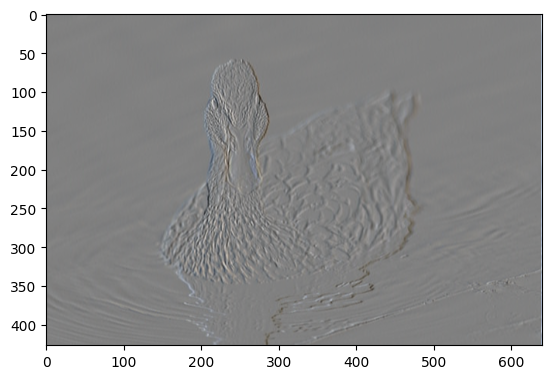

In [29]:
h_a = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

im = read_im("images/duck.jpeg")
im_sobel = convolve_im(im, h_a)
im_sobel = normalize(im_sobel)

plt.imshow(im_sobel)
save_im("results/duck_sobel.jpeg", im_sobel)

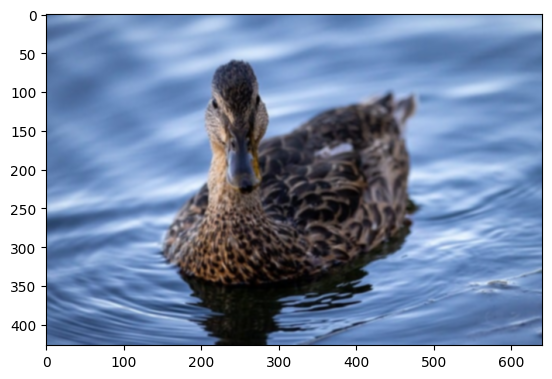

In [10]:
h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
 
im_smoothed = convolve_im(im, h_b)
im_smoothed = normalize(im_smoothed)

plt.imshow(im_smoothed, cmap='gray')
save_im("results/duck_smoothed.jpeg", im_smoothed)